In [2]:
import pystorms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a function for running evaluvating actions
def swmm_execute(actions=np.ones(11)):
    env = pystorms.scenarios.gamma()
    done = False
    # Append the states you might be intrested!
    nodes = [1, 2, 3, 4]
    env.data_log["depthN"] = {}
    for i in nodes:
        env.data_log["depthN"][str(i)] = []
    
    time = []
    while not done:
        time.append(env.env.sim.current_time)
        state = env.state()
        done = env.step(actions)
    return env.data_log, time


def resample(data, attr=["flow", "depthN"]):
    for i in attr:
        for node in data[i].keys():
            data[i][node] = pd.Series(data[i][node], data["time"])
            data[i][node] = data[i][node].resample("60S").max()
    return data


uc_data, time = swmm_execute()
uc_data["time"] = time

actions = [0.34895609, 1.        , 0.21987084, 0.20640974]
c_data, time = swmm_execute(actions)
c_data["time"] = time

uc_data = resample(uc_data)
c_data = resample(c_data)

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


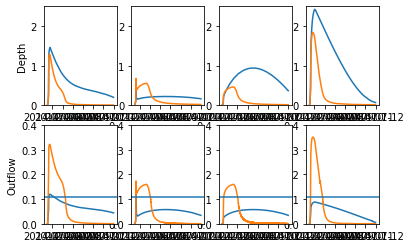

In [3]:
for i in [4, 3, 2, 1]:
    plt.subplot(2, 4, i)
    if i == 1:
        plt.ylabel("Depth")
    plt.plot(c_data["depthN"][str(i)] * 0.3048)
    plt.plot(uc_data["depthN"][str(i)] * 0.3048)
    plt.ylim([0, 2.5])

    plt.subplot(2, 4, i + 4)

    if i == 1:
        plt.ylabel("Outflow")
    plt.plot(c_data["flow"]["O" + str(i)] * 0.03)
    plt.plot(uc_data["flow"]["O" + str(i)] * 0.03)
    plt.axhline(0.11)
    plt.ylim([0, 0.40])
plt.show()

In [13]:
flows_g = 0.0
for i in [4, 3, 2, 1]:
    temp = c_data["flow"]["O" + str(i)].sub(4.0)
    temp[temp < 0.0] = 0.0
    flows_g += temp.sum()

In [14]:
flows_g

23.53720932693843

In [15]:
flows_g_uc = 0.0
for i in [4, 3, 2, 1]:
    temp = uc_data["flow"]["O" + str(i)].sub(4.0)
    temp[temp < 0.0] = 0.0
    flows_g_uc += temp.sum()

In [16]:
flows_g_uc

19065.117541038075

In [17]:
((flows_g_uc - flows_g)/flows_g_uc) * 100

99.87654306732557